# E-commerce Business Transaction

In [2]:
#import library yang dibutuhkan
import pandas as pd             #membaca dan mengolah dataframe
import matplotlib.pyplot as plt #membuat grafik
import seaborn as sns           #statistik lanjutan

In [3]:
#import dataset sales transaction
#dataset : https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business
df = pd.read_csv("Sales Transaction v.4a.csv")
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


Deskripsi Dataset:
- TransactionNo : Angka 6 digit yang mendefinisikan setiap transaksi (huruf C menunjukkan pembatalan)
- Date : Tanggal transaksi dilakukan
- ProductNo : Karakter 5-6 digit untuk mendefinisikan produk tertentu
- Product : Nama produk
- Price : Harga setiap produk per unit dalam pound sterling (£)
- Quantity : Jumlah produk yang dibeli pada transaksi (nilai minus menunjukkan pembatalan)
- CustomerNo : Angka 5 digit yang mendefinisikan pelanggan
- Country : Nama negara tempat pelanggan tinggal

Pertanyaan:
1. Bagaimana tren penjualan tiap bulan?
2. Apa produk yang paling sering dibeli?
3. Berapa banyak produk yang dibeli pelanggan dalam setiap transaksi?
4. Segmen pelanggan mana yang paling menguntungkan?
5. Strategi apa yang bisa dilakukan untuk mendapatkan lebih banyak untung?

# Preprocessinng Data

In [4]:
#cek apakah ada data yang kosong
df.isna().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

Terdapat 55 data kosong pada kolom CustomerNo, selanjutnya data kosong akan dihapus agar tidak mengganggu proses analisis

In [5]:
#menghapus 55 data kosong pada kolom CustomerNo
df.dropna(subset=['CustomerNo'], inplace=True)

#cek jumlah baris dan kolom setelah di cleaning
df.shape

(536295, 8)

In [6]:
#cek apakah ada data yang kosong
df.isna().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [7]:
#mengecek dtype data, apakah ada yang tidak sesuai
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536295 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536295 non-null  object 
 1   Date           536295 non-null  object 
 2   ProductNo      536295 non-null  object 
 3   ProductName    536295 non-null  object 
 4   Price          536295 non-null  float64
 5   Quantity       536295 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536295 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


- Kolom Date seharusnya memiliki Dtype berupa datetime, karena data berupa tanggal
- Kolom CustomerNo seharusnya memiliki Dtype berupa object dan menghilangkan .0 dibelakangnya, karena sebagai pembeda antara customer yang satu dengan yang lainnya

In [8]:
#mengubah dtype Date & CustomerNo
df['Date'] = pd.to_datetime(df['Date'])
df['CustomerNo'] = df['CustomerNo'].astype(int)
df['CustomerNo'] = df['CustomerNo'].astype(object)

In [9]:
#cek kembali dtype-nya
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536295 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536295 non-null  object        
 1   Date           536295 non-null  datetime64[ns]
 2   ProductNo      536295 non-null  object        
 3   ProductName    536295 non-null  object        
 4   Price          536295 non-null  float64       
 5   Quantity       536295 non-null  int64         
 6   CustomerNo     536295 non-null  object        
 7   Country        536295 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.8+ MB


In [10]:
#cek kembali bentuk datanya
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom


Data sudah bersih dan memiliki dtype yang sesuai. Selanjutnya adalah memisahkan dataset berdasarkan data transaksi pembelian dengan pesanan yang dibatalkan. Pesanan yang dibatalkan ditandai dengan huruf C pada awalan TransactionNo

In [11]:
#filter data TransactionNo yang di cancel dengan yang tidak
cancel_mask = df["TransactionNo"].str.startswith("C")
df_transaction = df[~cancel_mask]
df_cancel = df[cancel_mask]

In [12]:
df_transaction

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom
...,...,...,...,...,...,...,...,...
536320,536585,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460,United Kingdom
536321,536590,2018-12-01,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065,United Kingdom
536322,536590,2018-12-01,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065,United Kingdom
536323,536591,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606,United Kingdom


In [13]:
df_cancel

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
1616,C581484,2019-12-09,23843,Paper Craft Little Birdie,6.19,-80995,16446,United Kingdom
1617,C581490,2019-12-09,22178,Victorian Glass Hanging T-Light,6.19,-12,14397,United Kingdom
1618,C581490,2019-12-09,23144,Zinc T-Light Holder Stars Small,6.04,-11,14397,United Kingdom
1619,C581568,2019-12-09,21258,Victorian Sewing Box Large,6.19,-5,15311,United Kingdom
1620,C581569,2019-12-09,84978,Hanging Heart Jar T-Light Holder,6.19,-1,17315,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472,Germany
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472,Germany
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472,Germany
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472,Germany


# Exploratory Data

In [14]:
#cek data pada df_transaction
for dtype, col in (list(zip(df_transaction.dtypes, df_transaction.columns))):
  if dtype == 'int64' or dtype == 'float64':
    print(col, dtype)
    print(df_transaction[col].min(), df_transaction[col].max())
  else:
    print(col, dtype)
    print(df_transaction[col].unique())

  print()

TransactionNo object
['581482' '581475' '581476' ... '536374' '536393' '536585']

Date datetime64[ns]
['2019-12-09T00:00:00.000000000' '2019-12-08T00:00:00.000000000'
 '2019-12-07T00:00:00.000000000' '2019-12-06T00:00:00.000000000'
 '2019-12-05T00:00:00.000000000' '2019-12-04T00:00:00.000000000'
 '2019-12-02T00:00:00.000000000' '2019-12-01T00:00:00.000000000'
 '2019-11-30T00:00:00.000000000' '2019-11-29T00:00:00.000000000'
 '2019-11-28T00:00:00.000000000' '2019-11-27T00:00:00.000000000'
 '2019-11-25T00:00:00.000000000' '2019-11-24T00:00:00.000000000'
 '2019-11-23T00:00:00.000000000' '2019-11-22T00:00:00.000000000'
 '2019-11-21T00:00:00.000000000' '2019-11-20T00:00:00.000000000'
 '2019-11-18T00:00:00.000000000' '2019-11-17T00:00:00.000000000'
 '2019-11-16T00:00:00.000000000' '2019-11-15T00:00:00.000000000'
 '2019-11-14T00:00:00.000000000' '2019-11-13T00:00:00.000000000'
 '2019-11-11T00:00:00.000000000' '2019-11-10T00:00:00.000000000'
 '2019-11-09T00:00:00.000000000' '2019-11-08T00:00:00

['Set Of 2 Wooden Market Crates' 'Christmas Star Wish List Chalkboard'
 'Storage Tin Vintage Leaf' ... 'Wrap Pink Flock' 'Girly Pink Tool Set'
 'Pink Marshmallow Scarf Knitting Kit']

Price float64
5.13 660.62

Quantity int64
1 80995

CustomerNo object
[17490 13069 12433 ... 13065 18011 17558]

Country object
['United Kingdom' 'Norway' 'Belgium' 'Germany' 'France' 'Austria'
 'Netherlands' 'EIRE' 'Iceland' 'Portugal' 'Spain' 'Italy' 'Greece' 'USA'
 'Channel Islands' 'Sweden' 'Denmark' 'Finland' 'Switzerland' 'Japan'
 'Australia' 'Cyprus' 'Malta' 'Poland' 'Hong Kong' 'Singapore' 'RSA'
 'Czech Republic' 'Israel' 'Unspecified' 'United Arab Emirates' 'Canada'
 'European Community' 'Bahrain' 'Brazil' 'Saudi Arabia' 'Lebanon'
 'Lithuania']



In [15]:
#cek data pada df_cancel
for dtype, col in (list(zip(df_cancel.dtypes, df_cancel.columns))):
  if dtype == 'int64' or dtype == 'float64':
    print(col, dtype)
    print(df_cancel[col].min(), df_cancel[col].max())
  else:
    print(col, dtype)
    print(df_cancel[col].unique())

  print()

TransactionNo object
['C581484' 'C581490' 'C581568' ... 'C536506' 'C536543' 'C536548']

Date datetime64[ns]
['2019-12-09T00:00:00.000000000' '2019-12-08T00:00:00.000000000'
 '2019-12-07T00:00:00.000000000' '2019-12-06T00:00:00.000000000'
 '2019-12-05T00:00:00.000000000' '2019-12-04T00:00:00.000000000'
 '2019-12-02T00:00:00.000000000' '2019-12-01T00:00:00.000000000'
 '2019-11-30T00:00:00.000000000' '2019-11-29T00:00:00.000000000'
 '2019-11-28T00:00:00.000000000' '2019-11-27T00:00:00.000000000'
 '2019-11-25T00:00:00.000000000' '2019-11-24T00:00:00.000000000'
 '2019-11-23T00:00:00.000000000' '2019-11-22T00:00:00.000000000'
 '2019-11-21T00:00:00.000000000' '2019-11-20T00:00:00.000000000'
 '2019-11-18T00:00:00.000000000' '2019-11-17T00:00:00.000000000'
 '2019-11-16T00:00:00.000000000' '2019-11-15T00:00:00.000000000'
 '2019-11-14T00:00:00.000000000' '2019-11-13T00:00:00.000000000'
 '2019-11-11T00:00:00.000000000' '2019-11-10T00:00:00.000000000'
 '2019-11-09T00:00:00.000000000' '2019-11-08T00

#### Q1: Bagaimana tren penjualan tiap bulan?

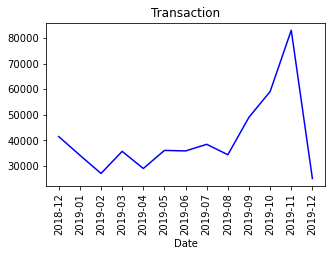

In [16]:
#ambil data bulan dan tahun saja pada df_transaction 
total_transaction = df_transaction['Date'].dt.strftime('%Y-%m').value_counts()
total_transaction = total_transaction.sort_index(ascending=True)

#membuat grafik total transaksi penjualan
plt.figure(figsize=(5,3))
plt.plot(total_transaction.index, total_transaction.values, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Date')
plt.title('Transaction')
plt.show()

- Berdasarkan grafik transaksi penjualan di atas, dapat dilihat bahwa grafik penjualan menunjukkan tren musiman yang mana dibulan tertentu akan sedikit transaksi dan di bulan lainya ada sangat banyak transaksi. Dilihat dari grafik, transaksi diakhir tahun lah yang menjadi puncak penjualan.
- Grafik transaksi penjualan mencapai puncak tertingginya pada November 2019, dengan jumlah lebih dari 80.000 transaksi.

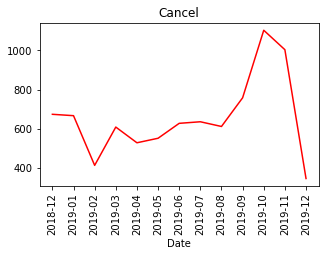

In [17]:
#ambil data bulan dan tahun saja pada df_cancel
total_cancel = df_cancel['Date'].dt.strftime('%Y-%m').value_counts()
total_cancel = total_cancel.sort_index(ascending=True)

#membuat grafik total pembatalan pemesanan
plt.figure(figsize=(5,3))
plt.plot(total_cancel.index, total_cancel.values, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Date')
plt.title('Cancel')
plt.show()

- Dari grafik pembatalan pesanan di atas, kita dapat melihat bahwa bentuk grafik pembatalan tidak jauh berbeda dengan grafik penjualan.
- Total pembatalan paling banyak terjadi pada bulan Oktober 2019 kemudian diikuti bulan November 2019. Hal tersebut menunjukkan bahwa semakin banyak transaksi penjualan terjadi, maka tingkat customer untuk membatalkan pesanannya cenderung tinggi.
- Walaupun cenderung tinggi, tetapi selisih antara total penjualan dan pembatalan sangat jauh untuk setiap bulannya.

#### Q2: Apa produk yang paling sering dibeli?

Dikarenakan jumlah produk yang sangat banyak dan tidak memungkinkan untuk memplot semua jenis produk, maka dalam proses ini hanya akan menampilkan 10 produk teratas yang paling laris.

In [18]:
#menghitung jumlah produk yang terjual
total_product = df_transaction.groupby('ProductName')['Quantity'].sum()
total_product

ProductName
10 Colour Spaceboy Pen              6571
12 Coloured Party Balloons          2155
12 Daisy Pegs In Wood Box            349
12 Egg House Painted Wood            149
12 Hanging Eggs Hand Painted          42
                                    ... 
Zinc T-Light Holder Stars Small     5089
Zinc Top 2 Door Wooden Shelf          13
Zinc Willie Winkie Candle Stick     2935
Zinc Wire Kitchen Organiser           30
Zinc Wire Sweetheart Letter Tray      83
Name: Quantity, Length: 3753, dtype: int64

In [19]:
#mengurutkan jumlah produk dari yang paling banyak dibeli sampai sedikit
total_product = total_product.sort_values(ascending=False)
total_product

ProductName
Paper Craft Little Birdie             80995
Medium Ceramic Top Storage Jar        78033
Popcorn Holder                        56921
World War 2 Gliders Asstd Designs     55047
Jumbo Bag Red Retrospot               48478
                                      ...  
Blue/Nat Shell Necklace W Pendant         1
Etched Glass Star Tree Decoration         1
Blossom Images Scrap Book Set             1
Gardeners Kneeling Pad                    1
Blue New Baroque Flock Candlestick        1
Name: Quantity, Length: 3753, dtype: int64

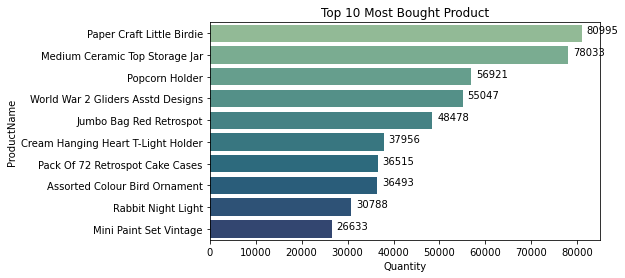

In [20]:
#ambil 10 produk teratas
df_top_10 = pd.DataFrame(total_product.head(10))

#agar memudahkan dalam menganalisis, maka akan di plot dalam diagram batang
plt.figure(figsize=(7,4))
ax = sns.barplot(data=df_top_10, x='Quantity', y=df_top_10.index, 
                 palette='crest')
plt.title('Top 10 Most Bought Product')

#menampilkan nilai di samping bar
for p in ax.patches:
    value = '{:.0f}'.format(p.get_width())
    x = p.get_x() + p.get_width() + 1000
    y = p.get_y() + p.get_height()/2
    ax.annotate(value, (x, y))
plt.show()

Dalam waktu 1 tahun (Desember 2018 - Desember 2019) produk yang paling laris atau paling banyak dibeli adalah Paper Craft Little Birdie dengan total penjualan sebanyak 80.995. Kemudian di urutan kedua terdapat Medium Ceramic Top Storage Jar dengan total penjualan sebanyak 78.033.

#### Q3: Berapa banyak produk yang dibeli pelanggan dalam setiap transaksi?

In [21]:
#menghitung jumlah produk yang dibeli dalam setiap transaksi
Total_Quantity = df_transaction.groupby('TransactionNo')['Quantity'].transform('sum')
Total_Quantity = pd.DataFrame(Total_Quantity)
print(Total_Quantity)

        Quantity
0            228
1            352
2            352
3            352
4            352
...          ...
536320         2
536321        74
536322        74
536323        93
536324        71

[527764 rows x 1 columns]


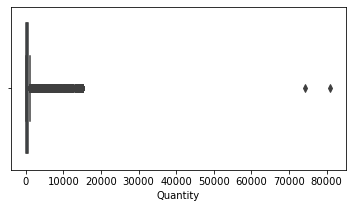

In [22]:
#boxplot dari jumlah produk yang dibeli dalam setiap transaksi
plt.figure(figsize=(6,3))
sns.boxplot(data=Total_Quantity, x='Quantity')
plt.show()

Terlihat bahwa terdapat beberapa transaksi yang membeli barang dengan jumlah yang sangat banyak dari kebanyakan customer. Jumlah barang yang dibeli sekitar angka 70.000 dan 80.000.

In [23]:
#menampilkan statistik deskriptif dari jumlah produk yang dibeli per transaksi
print(Total_Quantity.describe())

            Quantity
count  527764.000000
mean      539.230376
std       904.600901
min         1.000000
25%       152.000000
50%       303.000000
75%       573.000000
max     80995.000000


- Rata-rata produk yang dibeli per transaksi berjumlah 539.
- Jumlah pembelian produk paling sedikit berjumlah 1, dan jumlah produk terbanyak per transaksi berjumlah 80.995.
- Sebagian besar transaksi yang dilakukan memiliki jumlah produk antara 152 sampai 573.

#### Q4: Segmen pelanggan mana yang paling menguntungkan?

Dikarenakan segmen yang dibuat hanya berdasarkan tempat tinggal (Country), maka data yang diproses adalah pengelompokkan keuntungan (Price x Quantity) berdasarkan tempat tinggal (Country). 

Sebelum itu, kita cek terlebih dahulu jumlah Customer untuk setiap Country.

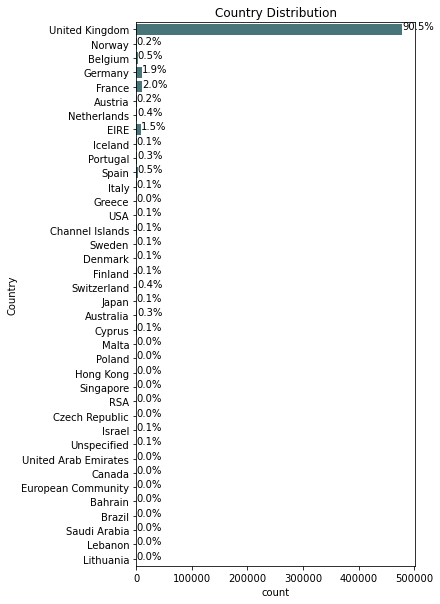

In [24]:
plt.figure(figsize=(5,10))
ax = sns.countplot(data=df_transaction, y='Country', color='#3E7C82')
plt.title('Country Distribution')

total = len(df_transaction['Country'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Terlihat bahwa Customer didominasi dari wilayah United Kingdom, yaitu sebanyak 90,5%. Adapun France di urutan kedua sebanyak 2% dan Germany di urutan ketiga sebanyak 1,9%.

In [26]:
#hitung nilai penjualan
df_transaction['Total_Sales'] = df_transaction['Price'] * df_transaction['Quantity']
df_transaction

<ipython-input-26-0195b21c6002>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transaction['Total_Sales'] = df_transaction['Price'] * df_transaction['Quantity']


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Total_Sales
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom,71.64
...,...,...,...,...,...,...,...,...,...
536320,536585,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460,United Kingdom,40.90
536321,536590,2018-12-01,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065,United Kingdom,20.45
536322,536590,2018-12-01,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065,United Kingdom,40.90
536323,536591,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606,United Kingdom,20.45


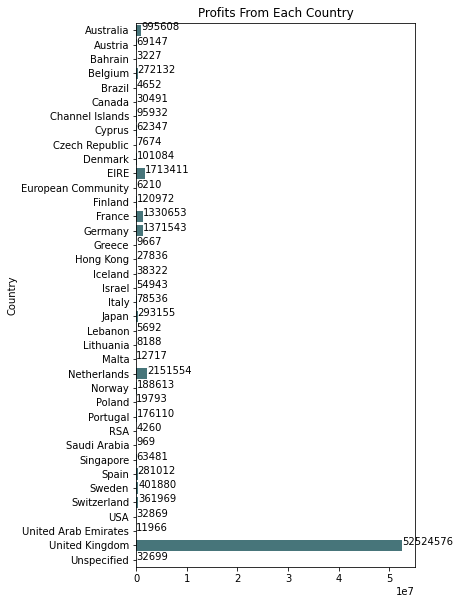

In [27]:
#segmentasi Country
Sales_Country = df_transaction.groupby('Country')['Total_Sales'].sum()

plt.figure(figsize=(5,10))
plt.title('Profits From Each Country')
ax = sns.barplot(data=df_transaction, x=Sales_Country.values, y=Sales_Country.index, color='#3E7C82')

#menampilkan nilai di samping bar
for p in ax.patches:
    value = '{:.0f}'.format(p.get_width())
    x = p.get_x() + p.get_width() + 1000
    y = p.get_y() + p.get_height()/2
    ax.annotate(value, (x, y))
plt.show()

Dalam waktu 1 tahun (Desember 2018 - Desember 2019), keuntungan paling banyak diperoleh dari United Kingdom yaitu sebesar £.52.524.576. Kemudian di posisi kedua diperoleh dari negara Netherlands sebesar £.2.151.554 dan di posisi ketiga dari EIRE sebesar £.1.713.411.

Selanjutnya akan dilihat berdasarkan Customer.

In [28]:
#segmentasi Customer
Sales_Customer = df_transaction.groupby(['CustomerNo','Country'])['Total_Sales'].sum()
Sales_Customer = Sales_Customer.sort_values(ascending=False)

#ambil 10 daftar customer teratas
Sort_Sales_Customer = Sales_Customer.head(10)
Sort_Sales_Customer

CustomerNo  Country       
14646       Netherlands       2112282.03
16446       United Kingdom    1002741.57
14911       EIRE               914633.52
12415       Australia          900545.54
18102       United Kingdom     897137.36
17450       United Kingdom     891438.53
12346       United Kingdom     840113.80
14156       EIRE               694965.02
13694       United Kingdom     646116.78
17511       United Kingdom     639006.19
Name: Total_Sales, dtype: float64

- Berdasarkan tabel di atas, dapat diketahui bahwa ternyata Customer pertama yang paling banyak memberikan keuntungan adalah costumer dengan No 14646 yang berasal dari negara Netherlands, yaitu sebesar £.2.112.282,03.
- Sedangkan diurutan kedua terdapat customer dengan No 16446 yang berasal dari negara UK, yaitu sebesar £.1.002.741,57.
- Walaupun sebanyak 90,5% customer berasal dari negara UK, ternyata customer No.1 yang paling banyak membeli berasal dari Netherlands. Walaupun begitu, customer yang berasal dari UK tetap mendominasi dan tetap memberikan keuntungan paling banyak dibandingkan negara lainnya.

#### Q5: Strategi apa yang bisa dilakukan untuk mendapatkan lebih banyak untung?

##### a). Analisis penjualan berdasarkan waktu

- Berdasarkan pola grafik yang sudah dibuat, terjadi kenaikan penjualan pada bulan November 2019. Hal tersebut dapat disebabkan oleh beberapa hal, diantaranya seperti faktor musiman. Hal tersebut mengakibatkan di bulan-bulan yang lainnya mengalami penurunan atau fluktuasi.
- Salah satu hal yang dapat dilakukan untuk menaikkan jumlah pembeli di bulan-bulan lainnya adalah dengan mengadakan promo mingguan ataupun bulanan yang rutin dilakukan, sehingga meningkatkan ketertarikan customer untuk membeli lebih banyak produk.

##### b). Analisis berdasarkan penjualan produk

- Jika dilihat dari total penjualan produk dalam 1 tahun, terdapat beberapa produk yang hanya terjual 1 buah saja. Tentunya dalam hal ini diperlukan suatu strategi khusus untuk meningkatkan penjualan barang yang masih di bawah rata-rata.
- Pemberian penawaran pada beberapa produk dapat menjadi salah satu strategi yang dapat dilakukan agar menarik minat customer untuk membeli barang tersebut.
- Selain itu, beberapa produk dapat dibuat bundle atau paket khusus yang disertakan pada produk-produk terlaris sehingga penjualan produk tersebut dapat meningkat.
- Untuk produk-produk yang sudah laris, maka dapat ditingkatkan kembali persediaan stok barangnya agar penjualan tidak mengalami penurunan.

##### c). Analisis berdasarkan pembelian oleh customer

- Berdasarkan analisis yang sudah dilakukan, terdapat beberapa customer yang paling "loyal" dalam membeli barang. Selain itu masih ada sedikitnya customer diluar UK yang masih membeli barang, yang mungkin dapat disebabkan karena tingginya biaya pengiriman dll.
- Untuk meningkatkan penjualan diluar UK, customer dapat diberikan keringanan biaya pengiriman agar skala penjualan lebih luas lagi tidak hanya untuk di UK.
- Sementara untuk customer yang "loyal", dapat diberikan penawaran khusus berupa penawaran insentif atau loyalitas untuk meningkatkan hubungan dengan pelanggan.